In [1]:
import sys
import notebook

print("Python version: " + sys.version)
print("Jupyter notebook version: " + notebook.__version__)

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Jupyter notebook version: 5.7.8


# Import Libraries and Data

In [37]:
import re
import math
from datetime import timedelta
# import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# setting to see all the columns
pd.set_option('display.max_columns', None)

# Download and Import Data
- 1. Dataset is on Google Drive with a open link.
- 2. Please click the link below and download a csv file named 'merged_file.csv'.
- https://drive.google.com/file/d/1rxWScCzr-SH2H55IC8xxijs6lXjkaPMZ/view?usp=drive_link
- 3. And then place the csv file in the same folder where 1-3 jupyter notebook files in.

In [12]:
# read the file
df = pd.read_csv('merged_file.csv')

In [4]:
# df # 181956 rows × 76 columns

In [96]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,15526,https://www.airbnb.com/rooms/15526,20220926182448,2022-09-26,previous scrape,Residenza PALAZZO lake view,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy","Hi, I am Andrea and since 2016, I co-manage th...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.000,5.000,"['email', 'phone']",t,t,"Solto Collina, Lombardia, Italy",Solto Collina,NaN,45.785,10.026,Entire villa,Entire home/apt,5,nan,2 baths,2.000,4.000,"[""Free parking on premises"", ""Children\u2019s ...",$96.00,3,28,2.000,3.000,1125.000,1125.000,3.000,1125.000,nan,t,0,0,0,0,2022-09-26,42,5,0,2011-06-14,2022-08-13,4.830,4.930,4.830,4.950,4.900,4.760,4.850,NaN,t,5,5,0,0,0.310,bergamo
1,15542,https://www.airbnb.com/rooms/15542,20220926182448,2022-09-26,previous scrape,Suite PANORAMA facing the lake,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy","Hi, I am Andrea and since 2016, I co-manage th...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.000,5.000,"['email', 'phone']",t,t,"Solto Collina, Lombardy, Italy",Solto Collina,NaN,45.784,10.025,Entire villa,Entire home/apt,3,nan,1 bath,1.000,2.000,"[""Free parking on premises"", ""Children\u2019s ...",$70.00,3,28,3.000,4.000,1125.000,1125.000,3.000,1125.000,nan,t,2,2,2,2,2022-09-26,43,1,1,2012-05-23,2022-09-02,4.910,5.000,4.830,5.000,4.950,4.900,4.880,NaN,t,5,5,0,0,0.340,bergamo
2,31412,https://www.airbnb.com/rooms/31412,20220926182448,2022-09-26,city scrape,Cute and Cosy Terrace,Grazioso ed accogliente appartamento con terra...,NaN,https://a0.muscache.com/pictures/2983581/e5236...,134937,https://www.airbnb.com/users/show/134937,Elena,2010-05-30,"Bergamo, Italy",Ciao I am Elena. \r\nAfter my kids moved out I...,within an hour,96%,99%,f,https://a0.muscache.com/im/users/134937/profil...,https://a0.muscache.com/im/users/134937/profil...,NaN,12.000,13.000,"['email', 'phone']",t,t,NaN,Bergamo,NaN,45.691,9.671,Entire rental unit,Entire home/apt,4,nan,NaN,1.000,2.000,"[""TV"", ""Heating"", ""Dishes and silverware"", ""Ki...",$69.00,1,31,1.000,1.000,1125.000,1125.000,1.000,1125.000,nan,t,0,0,0,148,2022-09-26,93,2,0,2012-03-05,2021-10-05,4.820,

# Dataset Analysis

In [115]:
# list(df)

In [116]:
# df.info()

In [13]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.819560e+05,1.819560e+05,1.819560e+05,181870.000000,181870.000000,181956.000000,181956.000000,181956.000000,0.0,176419.000000,179806.000000,181956.000000,1.819560e+05,181954.00000,181954.000000,1.819540e+05,1.819540e+05,181954.000000,1.819540e+05,0.0,181956.000000,181956.000000,181956.000000,181956.000000,181956.000000,181956.000000,181956.000000,139000.000000,137881.000000,137887.000000,137855.000000,137872.000000,137854.000000,137850.000000,181956.000000,181956.000000,181956.000000,181956.000000,139000.000000
mean,1.214052e+17,2.022092e+13,1.479840e+08,40.635954,65.244906,41.146021,13.692193,4.096677,NaN,1.651647,2.621931,3.565670,1.650185e+04,3.34401,4.259450,1.105625e+05,1.460261e+05,3.653936,1.459231e+05,NaN,13.025451,29.756815,48.681417,206.200961,26.576848,6.958155,0.768004,4.659168,4.735384,4.735270,4.823582,4.810675,4.726251,4.637225,19.067852,17.305964,1.590489,0.044055,1.031833
std,2.503712e+17,6.533453e+06,1.467685e+08,169.450233,304.382593,2.986312,2.730557,2.215784,NaN,0.991609,1.821903,17.716164,5.275609e+06,15.60235,19.167748,1.518353e+07,1.750906e+07,15.954653,1.749924e+07,NaN,11.983984,23.220777,34.339199,135.066650,59.244384,14.493576,1.785022,0.608005,0.455608,0.445801,0.388197,0.415224,0.410134,0.474541,95.362035,88.784936,6.949183,1.015244,1.710513
min,2.737000e+03,2.022091e+13,1.822000e+03,1.000000,1.000000,35.494150,9.025800,0.000000,NaN,1.000000,1.000000,1.000000,1.000000e+00,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.793897e+07,2.022091e+13,2.317709e+07,1.000000,1.000000,38.114800,12.230570,2.000000,NaN,1.000000,1.000000,1.000000,3.000000e+01,1.00000,2.000000,3.000000e+01,9.000000e+01,1.000000,9.000000e+01,NaN,0.000000,4.000000,12.000000,77.000000,1.000000,0.000000,0.000000,4.580000,4.670000,4.670000,4.800000,4.800000,4.630000,4.500000,1.000000,1.000000,0.000000,0.000000,0.150000
50%,3.496080e+07,2.022092e+13,9.364056e+07,3.000000,3.000000,40.845370,13.271040,4.000000,NaN,1.000000,2.000000,2.000000,3.650000e+02,2.00000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,NaN,10.000000,30.000000,53.000000,230.000000,5.000000,1.000000,0.000000,4.830000,4.880000,4.890000,4.950000,4.950000,4.860000,4.750000,2.000000,1.000000,0.000000,0.000000,0.500000
75%,5.129850e+07,2.022093e+13,2.446785e+08,6.000000,7.000000,43.774370,15.288793,5.000000,NaN,2.000000,3.000000,3.000000,1.125000e+03,3.00000,4.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,27.000000,55.000000,84.000000,343.000000,23.000000,7.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000,6.000000,4.000000,1.000000,0.000000,1.320000
max,7.257708e+17,2.022093e+13,4.809728e+08,1713.000000,20000.000000,46.524850,18.500770,16.000000,NaN,50.000000,50.000000,1125.000000,2.147484e+09,1125.00000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,1154.000000,856.000000,273.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1133.000000,1046.000000,80.000000,41.000000,326.4

In [7]:
# object type is 37 that should be converted to neumeric for a regression model. 
df.dtypes.value_counts()

object     37
float64    22
int64      17
dtype: int64

## Visualise in df for NA, without NA and Object 

- Number of columns has NA are 42 that should be filled or omitted.
- Number of columns has no NA are 34.
- Number of object type columns are 37 that should be converted to neumeric for running a regression model. 

In [11]:
# Get columns without missing values
columns_without_missing = df.columns[df.notna().all()].tolist()

# Get columns without missing values
columns_without_missing = df.columns[df.notna().all()].tolist()

# Get columns with missing values
columns_with_missing = df.columns[df.isna().any()].tolist()

# Determine the maximum length for alignment
max_length = max(len(columns_without_missing), len(columns_with_missing))

# Make sure both lists have the same length by padding with None if necessary
if len(columns_without_missing) < max_length:
    columns_without_missing += ['-'] * (max_length - len(columns_without_missing))
if len(columns_with_missing) < max_length:
    columns_with_missing += ['-'] * (max_length - len(columns_with_missing))

# Get the names of columns with the 'object' data type
object_columns = df.select_dtypes(include='object').columns.tolist()

# Make sure the lengths of all lists match
max_length_all = max(max_length, len(object_columns))

if len(columns_without_missing) < max_length_all:
    columns_without_missing += ['-'] * (max_length_all - len(columns_without_missing))
if len(columns_with_missing) < max_length_all:
    columns_with_missing += ['-'] * (max_length_all - len(columns_with_missing))
if len(object_columns) < max_length_all:
    object_columns += ['-'] * (max_length_all - len(object_columns))

# Create a DataFrame to store the combined results
combined_df = pd.DataFrame({    
    'ColumnsWithMissingValues': columns_with_missing,
    'ColumnsWithoutMissingValues': columns_without_missing,
    'ObjectColumns': object_columns
})

# Count the number of columns 
num_columns_with_missing = len(columns_with_missing)
print(f"Number of columns with missing values: {num_columns_with_missing}")

# Display the combined DataFrame
combined_df

Number of columns with missing values: 42


,ColumnsWithMissingValues,ColumnsWithoutMissingValues,ObjectColumns
0,name,id,listing_url
1,description,listing_url,last_scraped
2,neighborhood_overview,scrape_id,source
3,host_name,last_scraped,name
4,host_since,source,description
5,host_location,picture_url,neighborhood_overview
6,host_about,host_id,picture_url
7,host_response_time,host_url,host_url
8,host_response_rate,host_verifications,host_name
9,host_acceptance_rate,neighbourhood_cleansed,host_since


## Visualisation of null values

In [14]:
# sorting columns in descending order 
sorted_cols = df.isnull().sum().sort_values(ascending=False).index

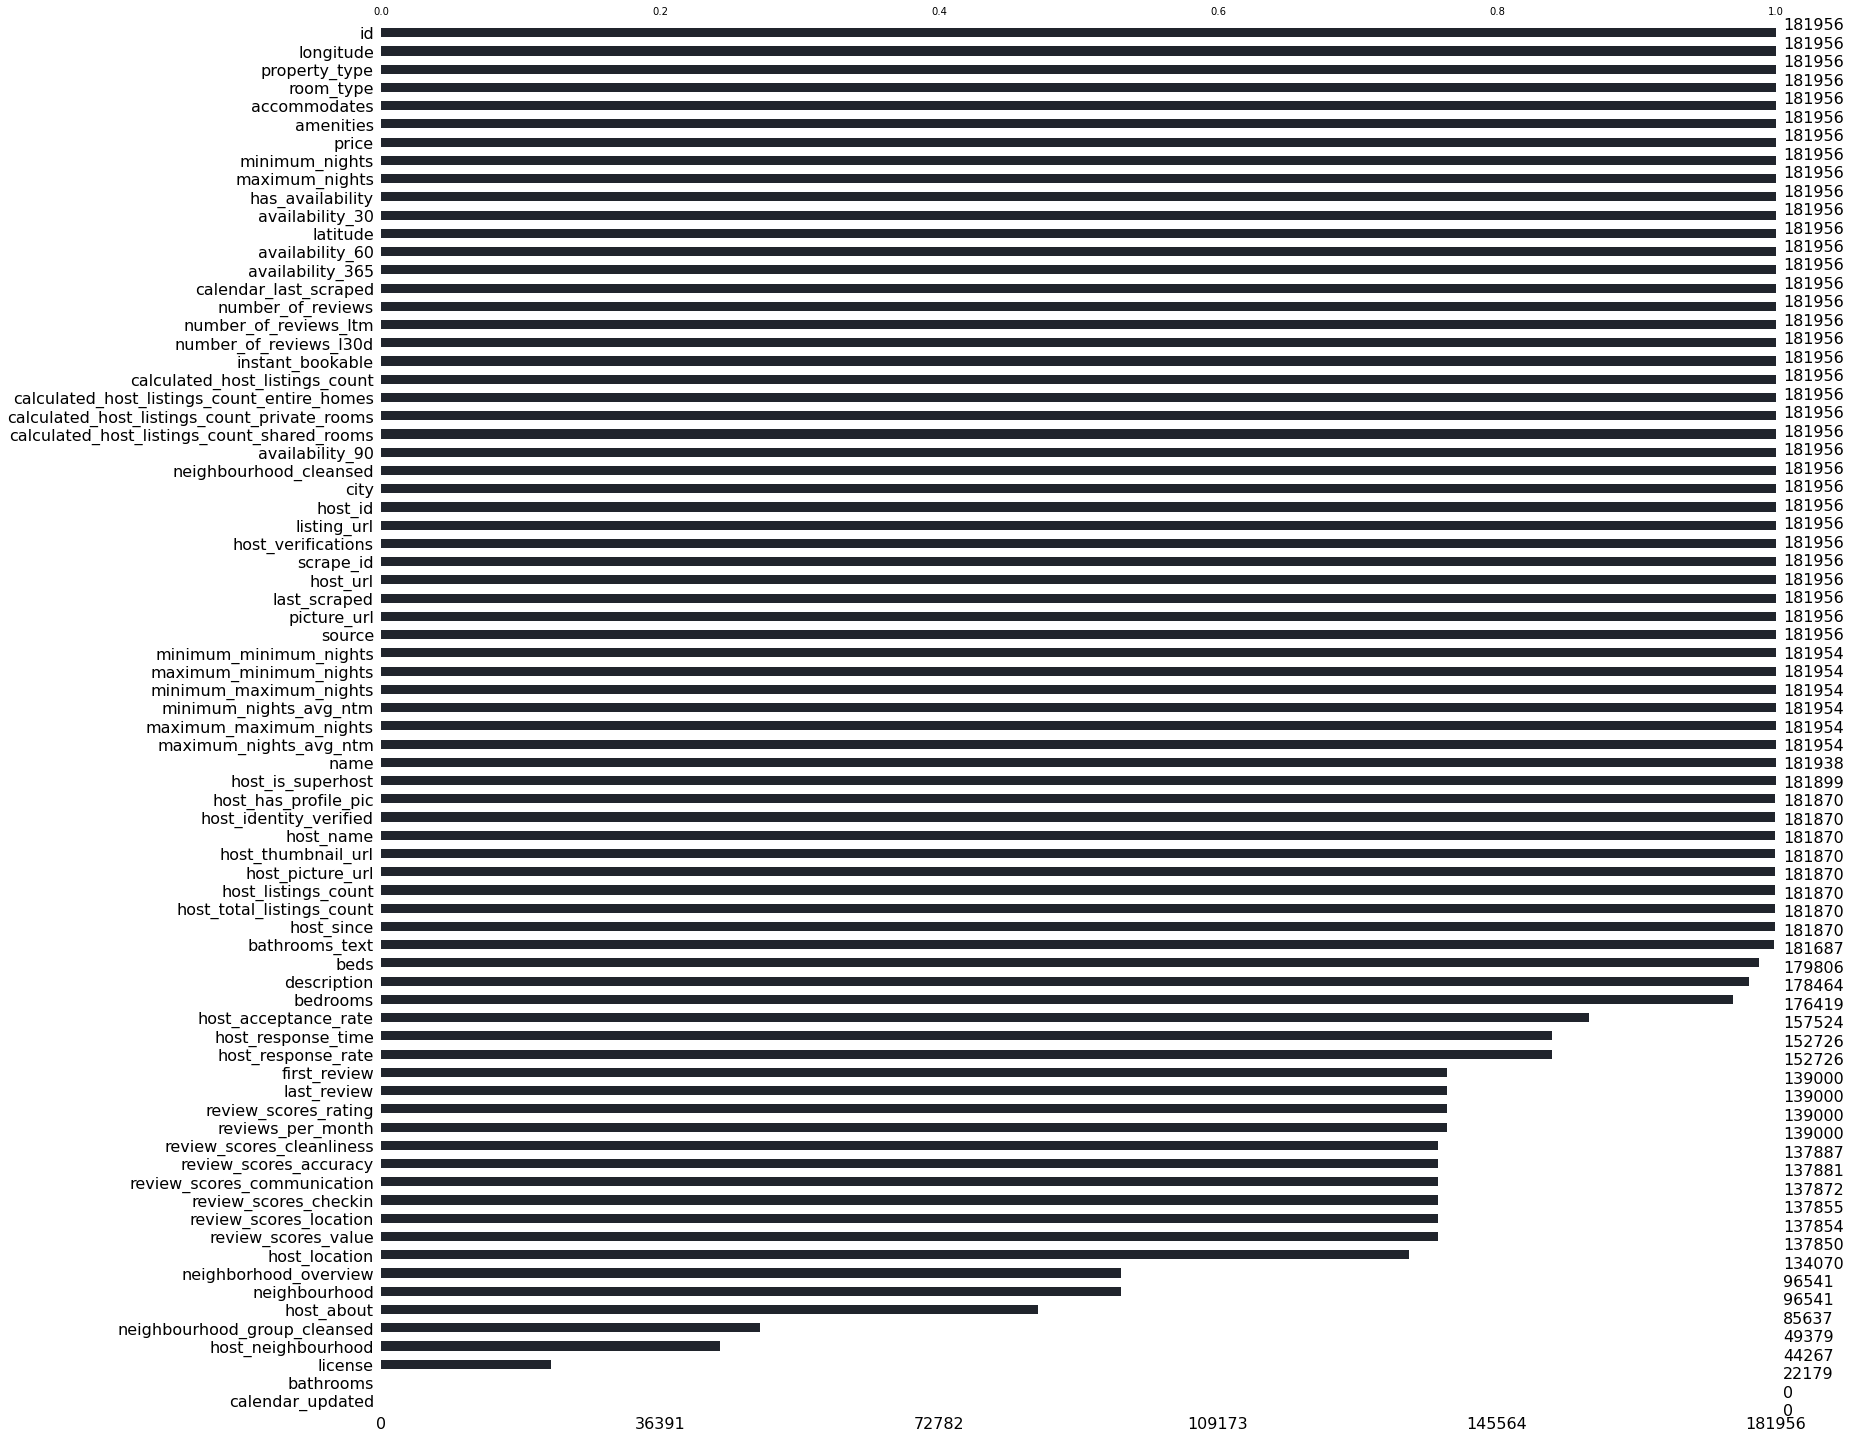

In [15]:
# values as a bar chart
sorted_cols = df.isnull().sum().sort_values(ascending=False).index
msno.bar(df[sorted_cols], color='#20242c')
# Visualize the number of missing
plt.show()

# Preprocessing

## date format :'to_datetime' for readable by pandas

In [16]:
# yyyy-mm-dd data type should be changed to 'to_datetime' for readable by pandas.
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

## Drop if NA in 'host_since' column

In [17]:
# Drop rows if they have NA in the 'host_since' column 
# Because one criterion that determines the size of the dataset is the 'host_since' feature. 
# In the absence of the 'host_since' column, the measurement of hosting tenure and the calculation of profitability become challenging.
filtered_df = df.dropna(subset=['host_since'])
filtered_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,15526,https://www.airbnb.com/rooms/15526,20220926182448,2022-09-26,previous scrape,Residenza PALAZZO lake view,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy","Hi, I am Andrea and since 2016, I co-manage th...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.0,5.0,"['email', 'phone']",t,t,"Solto Collina, Lombardia, Italy",Solto Collina,NaN,45.784640,10.026290,Entire villa,Entire home/apt,5,NaN,2 baths,2.0,4.0,"[""Free parking on premises"", ""Children\u2019s ...",$96.00,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2022-09-26,42,5,0,2022-09-26,2022-09-26,4.83,4.93,4.83,4.95,4.90,4.76,4.85,NaN,t,5,5,0,0,0.31,bergamo
1,15542,https://www.airbnb.com/rooms/15542,20220926182448,2022-09-26,previous scrape,Suite PANORAMA facing the lake,Ideally located on the middle ridge of a panor...,One of the highlights of lake Iseo is Montisol...,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy","Hi, I am Andrea and since 2016, I co-manage th...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.0,5.0,"['email', 'phone']",t,t,"Solto Collina, Lombardy, Italy",Solto Collina,NaN,45.783540,10.024710,Entire villa,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Free parking on premises"", ""Children\u2019s ...",$70.00,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,NaN,t,2,2,2,2,2022-09-26,43,1,1,2022-09-26,2022-09-26,4.91,5.00,4.83,5.00,4.95,4.90,4.88,NaN,t,5,5,0,0,0.34,bergamo
2,31412,https://www.airbnb.com/rooms/31412,20220926182448,2022-09-26,city scrape,Cute and Cosy Terrace,Grazioso ed accogliente appartamento con terra...,NaN,https://a0.muscache.com/pictures/2983581/e5236...,134937,https://www.airbnb.com/users/show/134937,Elena,2010-05-30,"Bergamo, Italy",Ciao I am Elena. \r\nAfter my kids moved out I...,within an hour,96%,99%,f,https://a0.muscache.com/im/users/134937/profil...,https://a0.muscache.com/im/users/134937/profil...,NaN,12.0,13.0,"['email', 'phone']",t,t,NaN,Bergamo,NaN,45.690520,9.670990,Entire rental unit,Entire home/apt,4,NaN,NaN,1.0,2.0,"[""TV"", ""Heating"", ""Dishes and silverware"", ""Ki...",$69.00,1,31,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,148,2022-09-26,93,2,0,2022-09-26,2022-09-26,4.82,4.82,4.86,4.75,4.82,4.70,4.70,NaN,f,11,6,5,0,0.72,bergamo
3

In [16]:
# filtered_df.info()

In [17]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(filtered_df.isnull().sum())

## Removal of '$' symbols

In [18]:
filtered_df['price'] = filtered_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Removal of '%' symbols

In [19]:
filtered_df['host_response_rate'] = filtered_df['host_response_rate'].str.replace('%', '').str.replace(',', '').astype(float)
filtered_df['host_acceptance_rate'] = filtered_df['host_acceptance_rate'].str.replace('%', '').str.replace(',', '').astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
filtered_df['price'].describe()
# The output indicates we will need to normalisation or similar work on 'profitability' column which would be created based on 'price' column. 

count    181870.000000
mean        149.058680
std         690.484645
min           0.000000
25%          60.000000
50%          89.000000
75%         140.000000
max      100000.000000
Name: price, dtype: float64

## Number of duplicates: hosts listings 
- To correct incorrect listing counts
- In instances where the same host has posted multiple hostings, the values of 'host_listings_count' and 'host_total_listings_count' are duplicated. Therefore, rectification of this issue is necessary. Because, for instance in a dormitory room, if a host posts a listing for each bed in order to accommodate guests to full capacity, the hosting count for each bed is equivalently assigned as a product of the bed count. 

In [20]:
# A year is consist of 365 days. We should check this out before going further.
# host_since: 2018-02-24, last_scraped: 2022-09-15
# total period since 2018-02-24: 1670 days
# It doesn't make sence that 20000 numbers of hostings since 2018-02-24

# Select the desired columns
selected_columns = ['last_scraped', 'host_since', 'host_listings_count', 'host_total_listings_count']
# Select the max row where host_total_listings_count has max
filtered_rows = df[df['host_total_listings_count'] == df['host_total_listings_count'].max()]
selected_rows = filtered_rows[selected_columns]
selected_rows

,last_scraped,host_since,host_listings_count,host_total_listings_count
30790,2022-09-15,2018-02-24,127.0,20000.0


In [21]:
grouped_counts = filtered_df.groupby(['host_id', 'host_since']).size().reset_index(name='count')
merged_df = pd.merge(filtered_df, grouped_counts, on=['host_id', 'host_since'])

In [22]:
# Checking if the rows really have same counting numbers and duplicated
duplicated_rows = merged_df[merged_df.duplicated(subset=['host_id', 'host_since'], keep=False)]
selected_columns = ['host_id', 'host_since', 'host_listings_count', 'host_total_listings_count']

# This work is important before calculating profitability
print("Find duplicated rows of a number of hosting counts based on 'host_id' and 'host_since':")
duplicated_rows[selected_columns]

Find duplicated rows of a number of hosting counts based on 'host_id' and 'host_since':


,host_id,host_since,host_listings_count,host_total_listings_count
0,60754,2009-12-07,5.0,5.0
1,60754,2009-12-07,5.0,5.0
2,60754,2009-12-07,5.0,5.0
3,60754,2009-12-07,5.0,5.0
4,60754,2009-12-07,5.0,5.0
...,...,...,...,...
181812,5987936,2013-04-18,2.0,3.0
181838,5128717,2013-02-18,2.0,2.0
181839,5128717,2013-02-18,2.0,2.0
181862,71643810,2016-05-12,2.0,2.0


In [23]:
# calculation of division by 'count' for actual value of listings_count and total_listings_count
grouped_counts = filtered_df.groupby(['host_id', 'host_since']).size().reset_index(name='count')
merged_df = pd.merge(filtered_df, grouped_counts, on=['host_id', 'host_since'])
merged_df['listings_count_divided'] = merged_df['host_listings_count'] / merged_df['count']
merged_df['total_listings_count_divided'] = merged_df['host_total_listings_count'] / merged_df['count']

In [25]:
# merged_df.head()

In [26]:
# merged_df.info()

In [27]:
merged_df['listings_count_divided'].max()

968.0

In [28]:
merged_df[merged_df['listings_count_divided'] == merged_df['listings_count_divided'].max()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,count,listings_count_divided,total_listings_count_divided
80956,49254331,https://www.airbnb.com/rooms/49254331,20220926182435,2022-09-28,city scrape,Ferienhaus für 8 Gäste mit 80m² in Latiano (12...,Trulli zu vermieten in der Nähe des Meeres inn...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,238029336,https://www.airbnb.com/users/show/238029336,Buchungsservice SECRA Bookings,2019-01-21,"Dubai, United Arab Emirates","Hi, wir helfen als SECRA Bookings Service Team...",within an hour,100.0,61.0,f,https://a0.muscache.com/im/pictures/user/07d1e...,https://a0.muscache.com/im/pictures/user/07d1e...,Müggelheim,968.0,1001.0,"['email', 'phone']",t,t,NaN,Latiano,Brindisi,40.55077,17.71853,Entire home,Entire home/apt,8,NaN,3 baths,6.0,NaN,"[""Refrigerator"", ""Backyard"", ""Long term stays ...",10.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,0,0,0,0,2022-09-28,1,0,0,2022-09-28,2022-09-28,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,t,1,1,0,0,0.08,puglia,1,968.0,1001.0


In [29]:
# df['picture_url'].value_counts()

## Calculate Annual Profitability 
- Now we can calculate annual profitability with create column 'total_listings_count_divided'
- Caution: this project does not follow the formula of profitability in the business field, Own calculation, like the percentage of the annual sales, is applied instead.

### Checking the Formula and the values

In [30]:
merged_df['total_listings_count_divided'] * merged_df['price']

0          96.0
1          70.0
2         121.0
3          78.0
4          78.0
          ...  
181865    130.0
181866    132.0
181867    108.0
181868     58.0
181869    360.0
Length: 181870, dtype: float64

In [25]:
# from datetime import timedelta
one_year = timedelta(days=365)
# years
merged_df['total_listings_count_divided'] * merged_df['price'] / ((merged_df['calendar_last_scraped']-merged_df['host_since'])/one_year)

0           7.493584
1           5.464072
2           9.445038
3           6.088537
4           6.088537
             ...    
181865    125.529101
181866     20.000000
181867     13.934252
181868    112.010582
181869     76.752336
Length: 181870, dtype: float64

### Division by Num of years
- Log after Division due to the distribution. And the gap between mean and max are huge.
- And then, change the values into percentages because the target column is 'Profitability'.

#### Logarithm

In [26]:
aaa = merged_df['total_listings_count_divided'] * merged_df['price'] / ((merged_df['calendar_last_scraped'] - merged_df['host_since']) / one_year)
loglog = np.log(aaa)
loglog.sort_values()

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


110604         -inf
109758         -inf
109734         -inf
109647         -inf
109575         -inf
            ...    
21830     12.558092
21825     12.558092
22086     13.557081
154473    13.796053
37656     14.473180
Length: 181870, dtype: float64

#### -inf  => zero

In [27]:
# tolist
logl_list = loglog.tolist()

# '-inf' must not be a value: smaller than zero is equal to zero
for i in range(len(logl_list)):
    if logl_list[i] < 0:
        logl_list[i] = 0
        
print(logl_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



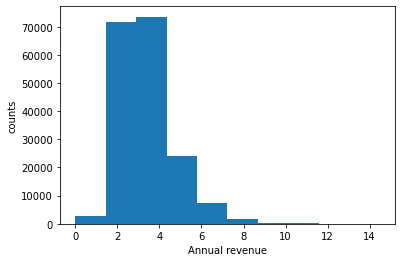

In [34]:
plt.hist(logl_list)
plt.xlabel('Annual revenue')
plt.ylabel('counts')
plt.show()

#### Change to Percentage

In [28]:
logl_array = np.array(logl_list)
normalized_list = (logl_array - logl_array.min()) / (logl_array.max() - logl_array.min()) * 100
normalized_list = np.round(normalized_list, 2)

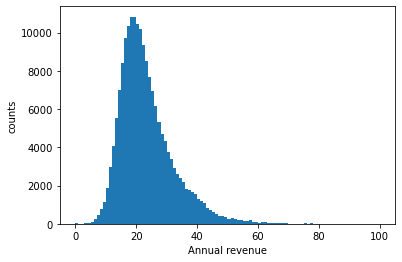

In [29]:
plt.hist(normalized_list, bins=100)
plt.xlabel('Annual revenue')
plt.ylabel('counts')
plt.show()

In [30]:
print(f"Mean Annual Revenue: {round(normalized_list.mean(), 2)}")
print(f"Median Annual Revenue: {np.median(normalized_list)}")

Mean Annual Revenue: 23.37
Median Annual Revenue: 21.59


### Add a column for 'profitability_by_numOfYears' 

In [31]:
# Add the list as a new column to the DataFrame
merged_df['profitability_by_numOfYears'] = normalized_list

In [39]:
# merged_df

# Feature Engeineering

In [32]:
# copy df in a new variable
data = merged_df

## Host's location
- If they are in the city or not?

In [33]:
## create a new column named 'host_loc2'

# initialise with 0
data['host_loc2'] = 0  
# 1 if a value ending with ', Italy'
data.loc[data['host_location'].str.endswith(', Italy', na=False), 'host_loc2'] = 1
# -1 if a value is null
data.loc[data['host_location'].isna(), 'host_loc2'] = -1 

print(((data['host_loc2'] == 0).sum()) + ((data['host_loc2'] == 1).sum()) + ((data['host_loc2'] == -1).sum()))
data['host_loc2'].unique()

181870


array([ 1,  0, -1], dtype=int64)

## Value of Y/N or T/F
- neighborhood_overview
- host_is_superhost
- license
- host_about
- instant_bookable

In [34]:
# Not null: 1, Null: 0  
data['neighborhood_overview'] = data['neighborhood_overview'].notnull().map({True: 1, False: 0})
data['host_about'] = data['host_about'].notnull().map({True: 1, False: 0})
data['license'] = data['license'].notnull().map({True: 1, False: 0})

In [35]:
# t: 1, f: 0, else: -1
data['host_is_superhost'] = data['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else -1)
data['has_availability'] = data['has_availability'].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else -1)
data['instant_bookable'] = data['instant_bookable'].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else -1)

## One-Hot Encoding: host_verifications
- After finish One-Hot Encoding => 'host_identity_verified' is no more needed.(Will be dropped)

In [44]:
# Checking unique values
data['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['email']", "['phone']", "['phone', 'work_email']", '[]',
       "['email', 'work_email']"], dtype=object)

In [45]:
# host_verifications => list type
data['host_verifications'] = data['host_verifications'].str.strip("[]").str.replace("'", "").str.split(",\s*")
# Extract unique values
unique_values = set(data['host_verifications'].explode().unique())
# One-Hot Encoding => Flatten the values in  [email', 'phone', 'work_email'
for value in ['email', 'phone', 'work_email']:
    data[value] = data['host_verifications'].apply(lambda x: int(value in x) if x else 0)

## Bathrooms
- The values should be changed to neumeric values

In [46]:
data['bathrooms_text'].unique()

array(['2 baths', '1 bath', '1.5 baths', nan, '3 baths', '1 private bath',
       '4 baths', '1 shared bath', '0 baths', '10 baths', '5.5 baths',
       '2.5 baths', 'Shared half-bath', 'Half-bath', '3.5 shared baths',
       '4 shared baths', '6 baths', '4.5 baths', '7 baths',
       '2 shared baths', '3.5 baths', '13.5 baths', '1.5 shared baths',
       '8 baths', '5 baths', '9 baths', '2.5 shared baths',
       '8.5 shared baths', '0 shared baths', '6.5 baths',
       '3 shared baths', '8.5 baths', '20.5 baths', '13 baths',
       '19 baths', '12 baths', '17 baths', 'Private half-bath',
       '19.5 baths', '7.5 baths', '18.5 baths', '9.5 baths', '10.5 baths',
       '4.5 shared baths', '20 baths', '5.5 shared baths',
       '8 shared baths', '5 shared baths', '11 baths', '7 shared baths',
       '15 baths', '11.5 baths', '6 shared baths', '16 baths',
       '9 shared baths', '12.5 baths', '17.5 baths', '15.5 baths',
       '50 baths', '10 shared baths', '21.5 baths', '25 baths',
  

In [47]:
# Extract unique values of 'bathroom' column 
unique_values = data['bathrooms_text'].unique()

data['bathroom_num'] = data['bathrooms_text'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
data['bathroom_str'] = data['bathrooms_text'].apply(lambda value: re.sub(r'[^a-zA-Z\s]', '', value).strip() if pd.notnull(value) else '')

In [48]:
for value in data['bathroom_str'].unique():
    if value.startswith('shared'):
        data.loc[data['bathroom_str'] == value, 'bathroom_type'] = 0
    elif value.startswith('private'):
        data.loc[data['bathroom_str'] == value, 'bathroom_type'] = 1
    else:
        data.loc[data['bathroom_str'] == value, 'bathroom_type'] = -1

In [49]:
print("bathroom types: ")
print(data['bathroom_type'].unique())
print()
print("Number of bathrooms: ")
print(data['bathroom_num'].unique())

bathroom types: 
[-1.  1.  0.]

Number of bathrooms: 
[ 2.   1.   1.5  nan  3.   4.   0.  10.   5.5  2.5  3.5  6.   4.5  7.
 13.5  8.   5.   9.   8.5  6.5 20.5 13.  19.  12.  17.  19.5  7.5 18.5
  9.5 10.5 20.  11.  15.  11.5 16.  12.5 17.5 15.5 50.  21.5 25.  30.
 14. ]


## Amenities
- Unique values of Amenities are huge.
- Count each value of the amenity column how many top 100 amenities they have.
- Assign the counted numbers as a new value for the 'amenities' column.

In [50]:
data["amenities"] = data["amenities"].apply(eval)

# Get unique items & counts
unique_values = data["amenities"].explode().value_counts().index.tolist()
unique_value_counts = data["amenities"].explode().value_counts().values

# Count number of amenities and store in a df
amen = {'Amenities':unique_values,'Counts':unique_value_counts}
amen_df = pd.DataFrame(amen)

# top 100 into a list
top_100_amen = amen_df['Amenities'].head(100).tolist()

# count how many amenities of top 100 list.
data["amenities"] = data["amenities"].apply(lambda x: sum(item in top_100_amen for item in x))
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,count,listings_count_divided,total_listings_count_divided,profitability_by_numOfYears,host_loc2,email,phone,work_email,bathroom_num,bathroom_str,bathroom_type
0,15526,https://www.airbnb.com/rooms/15526,20220926182448,2022-09-26,previous scrape,Residenza PALAZZO lake view,Ideally located on the middle ridge of a panor...,1,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy",1,within an hour,100.0,100.0,0,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.0,5.0,"[email, phone]",t,t,"Solto Collina, Lombardia, Italy",Solto Collina,NaN,45.78464,10.02629,Entire villa,Entire home/apt,5,NaN,2 baths,2.0,4.0,33,96.0,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,1,0,0,0,0,2022-09-26,42,5,0,2022-09-26,2022-09-26,4.83,4.93,4.83,4.95,4.90,4.76,4.85,0,1,5,5,0,0,0.31,bergamo,5,1.0,1.0,13.92,1,1,1,0,2.0,baths,-1.0
1,15542,https://www.airbnb.com/rooms/15542,20220926182448,2022-09-26,previous scrape,Suite PANORAMA facing the lake,Ideally located on the middle ridge of a panor...,1,https://a0.muscache.com/pictures/miso/Hosting-...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy",1,within an hour,100.0,100.0,0,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.0,5.0,"[email, phone]",t,t,"Solto Collina, Lombardy, Italy",Solto Collina,NaN,45.78354,10.02471,Entire villa,Entire home/apt,3,NaN,1 bath,1.0,2.0,27,70.0,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,NaN,1,2,2,2,2,2022-09-26,43,1,1,2022-09-26,2022-09-26,4.91,5.00,4.83,5.00,4.95,4.90,4.88,0,1,5,5,0,0,0.34,bergamo,5,1.0,1.0,11.73,1,1,1,0,1.0,bath,-1.0
2,1182796,https://www.airbnb.com/rooms/1182796,20220926182448,2022-09-26,previous scrape,"Casa La Terrazza, amazing lake view",Ideally located on the middle ridge of a panor...,1,https://a0.muscache.com/pictures/9d371b31-ce94...,60754,https://www.airbnb.com/users/show/60754,"Andrea, Maurizio, And Tina",2009-12-07,"Solto Collina, Italy",1,within an hour,100.0,100.0,0,https://a0.muscache.com/im/pictures/user/026d5...,https://a0.muscache.com/im/pictures/user/026d5...,NaN,5.0,5.0,"[email, phone]",t,t,"Solto Collina, Lombardia, Italy",Solto Collina,NaN,45.78477,10.02685,Entire villa,Entire home/apt,8,NaN,1.5 baths,3.0,6.0,29,121.0,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,NaN,1,2,2,2,2,2022-09-26,26,1,0,2022-09-26,2022-09-26,4.75,4.79,4.48,4.79,4.92,4.67,4.50,0,1,5,5,0,0,0.23,bergamo,5,1.0,1.0,15.51,1,1,1,0,1.5,baths,-1.0
3,14548269,https://www.airbnb.com/rooms/14548269,20220926182448,2022-0

## host_response_time

In [51]:
data['host_response_time'].unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [52]:
mapping = {
    'within an hour': 3,
    'within a few hours': 2,
    'within a day': 1,
    'a few days or more': 0
}
data['host_response_time'] = data['host_response_time'].map(mapping).fillna(-1)

In [53]:
data['host_response_time'].unique()

array([ 3., -1.,  2.,  1.,  0.])

## Property type & Room type

### property_type

In [54]:
# Very various
len(data['property_type'].unique())
# data['property_type'].unique()

129

In [55]:
# There is no NA
data['property_type'].isnull().sum()

0

In [56]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# encoder convert the values of property_type column
data['property_type_encoded'] = encoder.fit_transform(data['property_type'])

# checking encoded values
data['property_type_encoded'].unique()

array([ 31,  25,  52,  72,  20,  67,  23,  16,  43,  30,  91,  12,  14,
        61,  27,  86,  19,  74,  78,  29,  80,  36,   4,   0,  18,  87,
        17,  81,  59,  62,  41,  99,  24,  13,  15,  85,  95, 123,  32,
        22,  45, 114,  94,  11,  34, 103,  60,   6,  69,  57,  84, 104,
         9,  10, 122, 109,   1, 127, 125,  26,  39,   7,  48,   3,  68,
       102,  76,  56,  73,  96,  92, 107, 119, 115,  21, 110, 108, 121,
         5,  50,  47, 113,  90,  38,   8,  53, 118,  35,  44, 120,  97,
        49,  46,  79,  55,  75, 106,  63,  51,   2,  98,  33,  65,  58,
       101, 126,  89, 124,  77,  93,  40, 128, 117,  54,  71,  70,  66,
       112,  64, 105,  37,  82,  88, 111,  83,  42, 100,  28, 116],
      dtype=int64)

<If you need to Decode, check this code below> 

In [57]:
# data['property_type_decoded'] = encoder.inverse_transform(data['property_type_encoded'])
# data['property_type_decoded'].unique()

### room_type

In [58]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [59]:
data['room_type'].isnull().sum()

0

In [60]:
mapping = {
    'Entire home/apt': 3,
    'Hotel room': 2,
    'Private room': 1,
    'Shared room': 0
}

data['room_type'] = data['room_type'].map(mapping)

# Drop columns

In [61]:
# Save dataset in csv, just in case. 
data.to_csv('dataset.csv', index=False)

In [62]:
# making data frame from csv file
data = pd.read_csv("dataset.csv")

## Drop columns: Non-nuemeric data
- Exception: 'city' and 'neighbourhood_cleansed'

In [63]:
df1 = data.drop(['listing_url', 'last_scraped', 'source', 'name', 'description', 'picture_url', 'host_url', 
                     'host_name', 'host_since', 'host_location', 'host_thumbnail_url', 'host_picture_url',
                     'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                     'neighbourhood', 'neighbourhood_group_cleansed', 
                     'property_type', 'bathrooms', 'bathrooms_text', 'calendar_updated', 'calendar_last_scraped',
                     'first_review', 'last_review', 'bathroom_str'], axis=1)
df1.head()

,id,scrape_id,neighborhood_overview,host_id,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,count,listings_count_divided,total_listings_count_divided,profitability_by_numOfYears,host_loc2,email,phone,work_email,bathroom_num,bathroom_type,property_type_encoded
0,15526,20220926182448,1,60754,1,3.0,100.0,100.0,0,5.0,5.0,Solto Collina,45.78464,10.02629,3,5,2.0,4.0,33,96.0,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,1,0,0,0,0,42,5,0,4.83,4.93,4.83,4.95,4.90,4.76,4.85,0,1,5,5,0,0,0.31,bergamo,5,1.0,1.0,13.92,1,1,1,0,2.0,-1.0,31
1,15542,20220926182448,1,60754,1,3.0,100.0,100.0,0,5.0,5.0,Solto Collina,45.78354,10.02471,3,3,1.0,2.0,27,70.0,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,2,2,2,2,43,1,1,4.91,5.00,4.83,5.00,4.95,4.90,4.88,0,1,5,5,0,0,0.34,bergamo,5,1.0,1.0,11.73,1,1,1,0,1.0,-1.0,31
2,1182796,20220926182448,1,60754,1,3.0,100.0,100.0,0,5.0,5.0,Solto Collina,45.78477,10.02685,3,8,3.0,6.0,29,121.0,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,2,2,2,2,26,1,0,4.75,4.79,4.48,4.79,4.92,4.67,4.50,0,1,5,5,0,0,0.23,bergamo,5,1.0,1.0,15.51,1,1,1,0,1.5,-1.0,31
3,14548269,20220926182448,1,60754,1,3.0,100.0,100.0,0,5.0,5.0,Solto Collina,45.78332,10.02478,3,4,2.0,2.0,27,78.0,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,1,0,0,0,0,1,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,5,5,0,0,0.07,bergamo,5,1.0,1.0,12.48,1,1,1,0,2.0,-1.0,31
4,40245847,20220926182448,1,60754,1,3.0,100.0,100.0,0,5.0,5.0,Solto Collina,45.78298,10.02510,3,3,1.0,3.0,33,78.0,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,1,1,1,1,2,1,1,4.00,4.50,5.00,4.00,4.50,5.00,4.00,0,1,5,5,0,0,0.08,bergamo,5,1.0,1.0,12.48,1,1,1,0,1.0,-1.0,31


## Drop columns: Useless

In [64]:
df2 = df1.drop(['id', 'scrape_id', 'host_id', 'calculated_host_listings_count', 'price',
                'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms', 'count', 'host_listings_count',
                'listings_count_divided', 'total_listings_count_divided'], axis=1)
df2.head()

,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,city,profitability_by_numOfYears,host_loc2,email,phone,work_email,bathroom_num,bathroom_type,property_type_encoded
0,1,1,3.0,100.0,100.0,0,5.0,Solto Collina,45.78464,10.02629,3,5,2.0,4.0,33,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,1,0,0,0,0,42,5,0,4.83,4.93,4.83,4.95,4.90,4.76,4.85,0,1,0.31,bergamo,13.92,1,1,1,0,2.0,-1.0,31
1,1,1,3.0,100.0,100.0,0,5.0,Solto Collina,45.78354,10.02471,3,3,1.0,2.0,27,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,2,2,2,2,43,1,1,4.91,5.00,4.83,5.00,4.95,4.90,4.88,0,1,0.34,bergamo,11.73,1,1,1,0,1.0,-1.0,31
2,1,1,3.0,100.0,100.0,0,5.0,Solto Collina,45.78477,10.02685,3,8,3.0,6.0,29,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,2,2,2,2,26,1,0,4.75,4.79,4.48,4.79,4.92,4.67,4.50,0,1,0.23,bergamo,15.51,1,1,1,0,1.5,-1.0,31
3,1,1,3.0,100.0,100.0,0,5.0,Solto Collina,45.78332,10.02478,3,4,2.0,2.0,27,3,28,2.0,3.0,1125.0,1125.0,3.0,1125.0,1,0,0,0,0,1,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,0.07,bergamo,12.48,1,1,1,0,2.0,-1.0,31
4,1,1,3.0,100.0,100.0,0,5.0,Solto Collina,45.78298,10.02510,3,3,1.0,3.0,33,3,28,3.0,4.0,1125.0,1125.0,3.0,1125.0,1,1,1,1,1,2,1,1,4.00,4.50,5.00,4.00,4.50,5.00,4.00,0,1,0.08,bergamo,12.48,1,1,1,0,1.0,-1.0,31


In [65]:
## we have still null values
# df2.isnull().sum()

In [66]:
# fillna with a value of -1
df2.fillna(-1, inplace = True)

# EDA(Explanatory Data Analysis)

## Correlation

In [67]:
correlation_matrix = df2.corr()

# Filter correlations greater than 0.7
high_correlations = correlation_matrix[correlation_matrix > 0.7]
high_correlations = high_correlations[high_correlations < 1.0]

# Display the filtered correlations
print("Correlations higher than 0.7:")
high_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

Correlations higher than 0.7:


,host_response_time,host_response_rate,accommodates,bedrooms,beds,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathroom_num
host_response_time,NaN,0.93168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,0.93168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,0.762768,0.784812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,0.762768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700699
beds,NaN,NaN,0.784812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,NaN,NaN,NaN,NaN,NaN,NaN,0.878464,0.789564,NaN,NaN,0.881378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_minimum_nights,NaN,NaN,NaN,NaN,NaN,0.878464,NaN,0.813207,NaN,NaN,0.978255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maximum_minimum_nights,NaN,NaN,NaN,NaN,NaN,0.789564,0.813207,NaN,NaN,NaN,0.853627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_maximum_nights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867167,NaN,0.867654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maximum_maximum_nights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867167,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


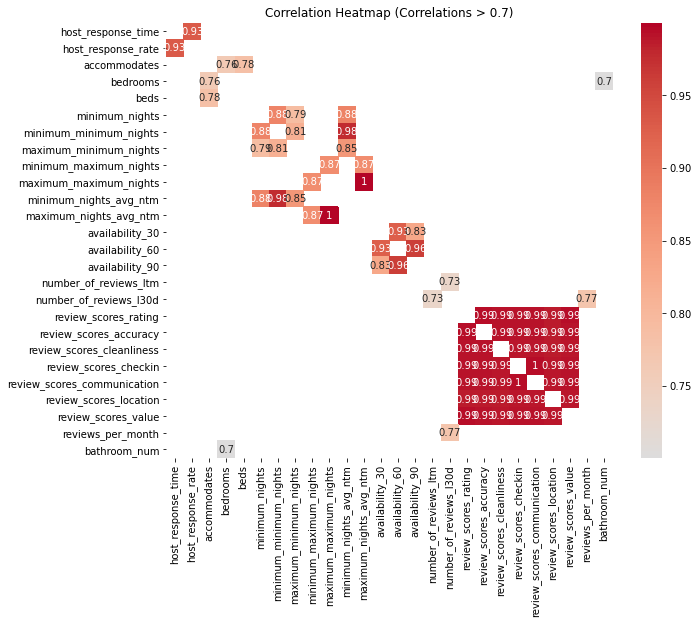

In [68]:
correlation_matrix = df2.corr()

# Filter correlations greater than 0.7
high_correlations = correlation_matrix[correlation_matrix > 0.7]
high_correlations = high_correlations[high_correlations < 1.0]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1),
            annot=True, cmap="coolwarm", center=0.7)
plt.title("Correlation Heatmap (Correlations > 0.7)")
plt.show()

In [69]:
# # set figure size
# plt.figure(figsize=(15,10))

# # Generate a mask to onlyshow the bottom triangle
# mask = np.triu(np.ones_like(df3.corr(), dtype=bool))

# # generate heatmap
# sns.heatmap(df3.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
# plt.title('Correlation Coefficient Of Predictors')
# plt.show()

## Multicollinearity

In [36]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Check All Columns

In [71]:
def compute_vif(data):
    X = data.drop(columns=['city', 'neighbourhood_cleansed'])  # Remove 'city' column because 'city' is only non-numeric
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

# Set the float format to display without scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)

vif_results = compute_vif(df2)
vif_results

,Variable,VIF
0,neighborhood_overview,1.163
1,host_about,1.283
2,host_response_time,8.810
3,host_response_rate,8.211
4,host_acceptance_rate,2.072
5,host_is_superhost,1.324
6,host_total_listings_count,1.249
7,latitude,1.808
8,longitude,1.801
9,room_type,4.452


### Partial Checking

In [72]:
def compute_vif(data, considered_features):
    x = data.drop(columns=['city', 'neighbourhood_cleansed'])
    X = x[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [73]:
# features to consider removing
considered_features = ['accommodates', 'bedrooms', 'beds']

# compute vif 
compute_vif(df2, considered_features).sort_values('VIF', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Variable,VIF
0,accommodates,3.408
2,beds,2.770
1,bedrooms,2.544


In [74]:
# features to consider removing
considered_features = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# compute vif 
compute_vif(df2, considered_features).sort_values('VIF', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Variable,VIF
1,availability_60,51.732
2,availability_90,26.124
0,availability_30,11.824
3,availability_365,1.924


In [75]:
considered_features = ['availability_30', 'availability_90', 'availability_365']
compute_vif(df2, considered_features).sort_values('VIF', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Variable,VIF
1,availability_90,4.462
0,availability_30,3.234
2,availability_365,1.870


In [76]:
considered_features = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
compute_vif(df2, considered_features).sort_values('VIF', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Variable,VIF
4,review_scores_communication,138.410
3,review_scores_checkin,137.117
0,review_scores_rating,129.128
1,review_scores_accuracy,123.837
6,review_scores_value,105.388
2,review_scores_cleanliness,87.855
5,review_scores_location,60.760


## Re-Drop columns Before Spliting df
- 1. review_scores related columns have high VIF.  Keep 'review_scores_rating' Only.
- 2. If 'availability_60' removed, there is no issue between availability related columns . Drop just 'availability_60'
- 3. 'minimum_nights' and 'maximum_nights' are enough.

In [77]:
df3 = df2.drop(['review_scores_communication', 'review_scores_checkin', 'review_scores_accuracy',
 'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'availability_60',
'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)
df3

,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_30,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,license,instant_bookable,reviews_per_month,city,profitability_by_numOfYears,host_loc2,email,phone,work_email,bathroom_num,bathroom_type,property_type_encoded
0,1,1,3.000,100.000,100.000,0,5.000,Solto Collina,45.785,10.026,3,5,2.000,4.000,33,3,28,1,0,0,0,42,5,0,4.830,0,1,0.310,bergamo,13.920,1,1,1,0,2.000,-1.000,31
1,1,1,3.000,100.000,100.000,0,5.000,Solto Collina,45.784,10.025,3,3,1.000,2.000,27,3,28,1,2,2,2,43,1,1,4.910,0,1,0.340,bergamo,11.730,1,1,1,0,1.000,-1.000,31
2,1,1,3.000,100.000,100.000,0,5.000,Solto Collina,45.785,10.027,3,8,3.000,6.000,29,3,28,1,2,2,2,26,1,0,4.750,0,1,0.230,bergamo,15.510,1,1,1,0,1.500,-1.000,31
3,1,1,3.000,100.000,100.000,0,5.000,Solto Collina,45.783,10.025,3,4,2.000,2.000,27,3,28,1,0,0,0,1,0,0,5.000,0,1,0.070,bergamo,12.480,1,1,1,0,2.000,-1.000,31
4,1,1,3.000,100.000,100.000,0,5.000,Solto Collina,45.783,10.025,3,3,1.000,3.000,33,3,28,1,1,1,1,2,1,1,4.000,0,1,0.080,bergamo,12.480,1,1,1,0,1.000,-1.000,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181865,1,1,3.000,100.000,100.000,1,1.000,Castello,45.430,12.354,3,4,2.000,2.000,36,3,10,1,0,38,129,20,20,3,5.000,1,0,1.730,venezia,33.390,-1,1,1,0,1.500,-1.000,25
181866,1,1,2.000,100.000,90.000,0,1.000,Giudecca,45.426,12.333,3,2,1.000,1.000,26,2,28,1,0,0,0,257,12,0,4.790,1,0,3.250,venezia,20.700,1,1,1,0,1.000,-1.000,25
181867,1,0,-1.000,-1.000,0.000,0,2.000,Pellestrina,45.219,12.280,3,2,1.000,1.000,12,5,1125,1,0,0,249,42,0,0,4.620,0,0,0.520,venezia,18.200,1,1,1,0,1.000,-1.000,16
181868,1,0,3.000,100.000,100.000,1,1.000,Pellestrina,45.219,12.291,3,5,2.000,3.000,23,1,28,1,12,72,347,8,8,0,5.000,1,0,1.680,venezia,32.600,-1,1,1,0,1.000,-1.000,16


## Split df into 10 cities

### Split and Save to 10 CSV files

In [78]:
city_list = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']
cities = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']

city_dfs = {}  # Dictionary to store DataFrames for each city

# Select rows where 'city' column matches the current city and drop the 'city' column
for city in city_list:
    city_dfs[city] = df3[df3['city'] == city].drop('city', axis=1)  
    
for city in cities:
    globals()[city + '_df'] = city_dfs[city]
    # Save each DataFrame as a CSV file
    globals()[city + '_df'].to_csv(city + '_df.csv', index=False)

### Read City data files

In [79]:
city_dfs = ['bergamo_df', 'roma_df', 'milano_df', 'sicilia_df', 'trentino_df', 'puglia_df',
       'firenze_df', 'venezia_df', 'napoli_df', 'bologna_df']

dataframes = [pd.read_csv(f'{df}.csv') for df in city_dfs]

In [80]:
bergamo_df, roma_df, milano_df, sicilia_df, trentino_df, puglia_df, firenze_df, venezia_df, napoli_df, bologna_df = dataframes

### Distributions

#### Visualise 10 subplots at once (2 x 5)

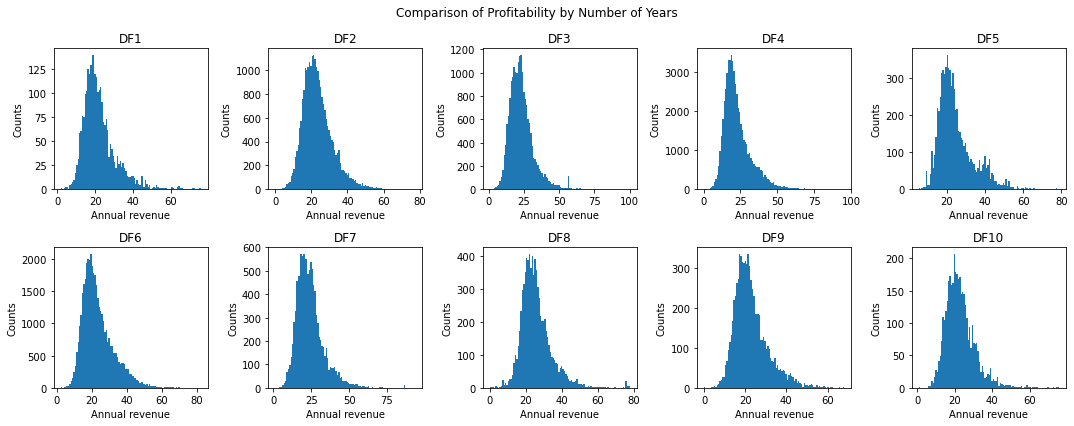

In [81]:
# Create subplots for all histograms
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Comparison of Profitability by Number of Years")

# Loop through all dfs and plot histograms
for i, df in enumerate([bergamo_df, roma_df, milano_df, sicilia_df, trentino_df, puglia_df, 
                        firenze_df, venezia_df, napoli_df, bologna_df]):
    row = i // 5
    col = i % 5
    axs[row, col].hist(df['profitability_by_numOfYears'], bins=100)
    axs[row, col].set_title(f'DF{i+1}')
    axs[row, col].set_xlabel('Annual revenue')
    axs[row, col].set_ylabel('Counts')

plt.tight_layout()
plt.show()

#### Density histograms for all DataFrames, overlapped in one Figure.
Compare the relative distribution of datasets at a glance.

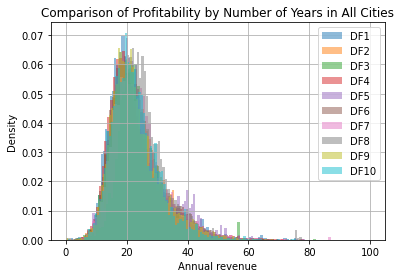

In [82]:
# Create density histograms for all DataFrames
for df in [bergamo_df, roma_df, milano_df, sicilia_df, trentino_df,
                                                     puglia_df, firenze_df, venezia_df, napoli_df, bologna_df]:
    df['profitability_by_numOfYears'].hist(bins=100, density=True, alpha=0.5)

plt.xlabel('Annual revenue')
plt.ylabel('Density')
plt.title("Comparison of Profitability by Number of Years in All Cities")
plt.legend(labels=[f"DF{i+1}" for i in range(10)])
plt.show()

#### Comparison of mean and median
Central tendency checking.

In [83]:
# Calculate statistics for each DataFrame
statistics = []
for df in [bergamo_df, roma_df, milano_df, sicilia_df, trentino_df, puglia_df, 
                        firenze_df, venezia_df, napoli_df, bologna_df]:
    mean = np.mean(df['profitability_by_numOfYears'])
    median = np.median(df['profitability_by_numOfYears'])
    statistics.append((mean, median))

# Print statistics
for i, (mean, median) in enumerate(statistics):
    print(f"DF{i+1}: Mean = {mean:.2f}, Median = {median:.2f}")

DF1: Mean = 22.17, Median = 20.31
DF2: Mean = 23.49, Median = 22.21
DF3: Mean = 23.12, Median = 21.94
DF4: Mean = 22.90, Median = 20.69
DF5: Mean = 24.50, Median = 22.16
DF6: Mean = 23.42, Median = 21.41
DF7: Mean = 24.11, Median = 22.62
DF8: Mean = 25.70, Median = 24.26
DF9: Mean = 22.88, Median = 21.32
DF10: Mean = 22.82, Median = 21.59


### one-way ANOVA
: Analysis of Variance Test

The hypothesis is related to whether the means of the profitability values are equal across different cities or not. 

- Null Hypothesis (H0): The means of profitability values are equal across all cities.
- Alternative Hypothesis (H1): At least one mean is different from the others.

In [84]:
import scipy.stats as stats

# one-way ANOVA 
f_statistic, p_value = stats.f_oneway(bergamo_df['profitability_by_numOfYears'], roma_df['profitability_by_numOfYears'],
                                      milano_df['profitability_by_numOfYears'], sicilia_df['profitability_by_numOfYears'],
                                      trentino_df['profitability_by_numOfYears'], puglia_df['profitability_by_numOfYears'],
                                      firenze_df['profitability_by_numOfYears'], venezia_df['profitability_by_numOfYears'],
                                      napoli_df['profitability_by_numOfYears'], bologna_df['profitability_by_numOfYears'])

print("One-way ANOVA p-value:", round(p_value, 5))


One-way ANOVA p-value: 0.0


There is a significant difference in the means of profitability values among the cities. In other words, the observed difference among the city groups is extremely unlikely to have occurred due to random chance because the p-value is nearly zero.